In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import requests
import json
import time

In [40]:
cargo_sample = pd.read_excel('CargoSample2.xlsx')
machines = pd.read_excel('machines.xlsx')

In [41]:
cargo_sample.drop(columns=['SaleInvoice_ID', 'MainAccount_ID'], inplace=True)
cargo_sample.head()

,Cargo_ID,DepartmentInfo_ID,CargoDate,LatitudePoint,LongitudePoint,InvVolume,InvWeight,Vehicle_ID
0,140221007729,18,2023-07-02,35.84502,51.01495,21228.7500,3300.0000,14001.0
1,140221007729,18,2023-07-02,35.78390,50.99630,8623.2000,2502.5847,14001.0
2,140221007729,18,2023-07-02,35.83337,51.01529,20138.3545,5089.1921,14001.0
3,140221007729,18,2023-07-02,35.80515,50.98933,31734.1868,12568.3889,14001.0
4,140221007730,27,2023-07-02,36.66479,48.53443,13362.2775,3084.8680,140141.0


In [42]:
machines.drop(columns=['VehicleNum', 'Title', 'Title.1', 'Hieght', 'KindOfPallet_ID', 'Title.2', 'FuelConsumption100K', 'Title.3', 'Fuel100K', 'FuelType', 'DepreciationRatio', 'KmRate', 'FuelExpencesRate', 'Widthk', 'LenghtK', 'FuelShare'], inplace=True)
machines.head()

,Vehicle_ID,VehicleWeightCapacity,PalletCapacity,VloumeK
0,14001,1500.0,4.0,17.820
1,14002,1500.0,2.0,6.720
2,14003,10000.0,16.0,41.650
3,14004,22000.0,33.0,89.964
4,14008,1000.0,2.0,6.336


In [9]:
print("dates length => ", len(cargo_sample['CargoDate'].unique()))
print("dates => \n", cargo_sample['CargoDate'])

dates length =>  130
dates => 
 0        2023-07-02
1        2023-07-02
2        2023-07-02
3        2023-07-02
4        2023-07-02
            ...    
217417   2023-11-06
217418   2023-11-06
217419   2023-11-06
217420   2023-11-06
217421   2023-11-06
Name: CargoDate, Length: 217422, dtype: datetime64[ns]


In [10]:
# find the data in date that is the most frequent
cargo_sample['CargoDate'].value_counts().idxmax()

Timestamp('2023-10-16 00:00:00')

In [14]:
test_date_cargo_sample = cargo_sample[cargo_sample['CargoDate'] == '2023-10-16 00:00:00']
test_department_cargo_sample = test_date_cargo_sample[cargo_sample['DepartmentInfo_ID'] == 18]

C:\Users\alast\AppData\Local\Temp\ipykernel_7976\2948753984.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_department_cargo_sample = test_date_cargo_sample[cargo_sample['DepartmentInfo_ID'] == 18]


In [38]:
number_of_clusters = len(test_department_cargo_sample['Cargo_ID'].unique())
vehicles = machines[machines['Vehicle_ID'].isin(test_department_cargo_sample['Vehicle_ID'])]


In [61]:
features = ['LatitudePoint', 'LongitudePoint']
X = test_department_cargo_sample[features]

# create model and prediction
model = AgglomerativeClustering(n_clusters=number_of_clusters, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

test_department_cargo_sample['Cluster'] = labels
test_department_cargo_sample.head()

C:\Users\alast\AppData\Local\Temp\ipykernel_7976\2410833907.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_department_cargo_sample['Cluster'] = labels


,Cargo_ID,DepartmentInfo_ID,CargoDate,LatitudePoint,LongitudePoint,InvVolume,InvWeight,Vehicle_ID,Cluster
54908,140221017561,18,2023-10-16,35.59055,53.39645,2392.0878,1593.6006,140011.0,15
54909,140221017561,18,2023-10-16,35.58797,53.40183,96752.6706,9559.4430,140011.0,15
54910,140221017561,18,2023-10-16,35.59695,53.39154,139729.1044,37357.2314,140011.0,15
54911,140221017561,18,2023-10-16,35.59695,53.39154,11895.0000,3317.5008,140011.0,15
54912,140221017561,18,2023-10-16,35.59695,53.39154,303476.2500,19989.9960,140011.0,15


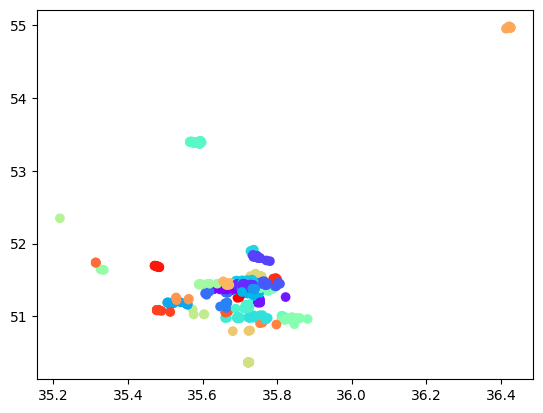

In [62]:
plt.scatter(X['LatitudePoint'], X['LongitudePoint'], c=labels, cmap='rainbow')

In [63]:
#sort the vehicles by maximum VehicleWeightCapacity
vehicles.sort_values(by=['VehicleWeightCapacity', 'VloumeK'], inplace=True, ascending=False)
vehicles.head()

,Vehicle_ID,VehicleWeightCapacity,VloumeK,Cluster
42,140030.0,10000.0,41.65,27.0
14,14022.0,2000.0,25.20,27.0
17,14025.0,2000.0,25.20,0.0
174,140176.0,2000.0,25.20,0.0
0,14001.0,1500.0,17.82,7.0


In [60]:
#loop through each cluster in test_department_cargo_sample
for i in range(number_of_clusters):
    cluster = test_department_cargo_sample[test_department_cargo_sample['Cluster'] == i]
     

C:\Users\alast\AppData\Local\Temp\ipykernel_7976\794862735.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_department_cargo_sample['Cluster'] = labels


Could not assign cargo 54909 to any distributor.
Could not assign cargo 54910 to any distributor.
Could not assign cargo 54912 to any distributor.
Could not assign cargo 54917 to any distributor.
Could not assign cargo 54919 to any distributor.
Could not assign cargo 54921 to any distributor.
Could not assign cargo 54922 to any distributor.
Could not assign cargo 54925 to any distributor.
Could not assign cargo 54926 to any distributor.
Could not assign cargo 54927 to any distributor.
Could not assign cargo 54928 to any distributor.
Could not assign cargo 54929 to any distributor.
Could not assign cargo 54930 to any distributor.
Could not assign cargo 54931 to any distributor.
Could not assign cargo 54933 to any distributor.
Could not assign cargo 54939 to any distributor.
Could not assign cargo 55575 to any distributor.
Could not assign cargo 55576 to any distributor.
Could not assign cargo 55577 to any distributor.
Could not assign cargo 55579 to any distributor.
Could not assign car